## Reading Files

In [7]:
import pandas as pd

df1 = pd.read_csv('file1.csv')
print(df1,'\n')

# The first row becomes the columns header
print(df1['b'])
print(df1['message'])

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo 

0     2
1     6
2    10
Name: b, dtype: int64
0    hello
1    world
2      foo
Name: message, dtype: object


In [8]:
# Generating column's headers automatically
df2 = pd.read_csv('file1.csv',header=None)
print(df2,'\n')
print(df2[1])
print(df2[4])


   0   1   2   3        4
0  a   b   c   d  message
1  1   2   3   4    hello
2  5   6   7   8    world
3  9  10  11  12      foo 

0     b
1     2
2     6
3    10
Name: 1, dtype: object
0    message
1      hello
2      world
3        foo
Name: 4, dtype: object


In [9]:
# Specifying column's headers 
df3 = pd.read_csv('file1.csv',names=['i','j','k','l','m'])
print(df3,'\n')
print(df3['j'])
print(df3['m'],'\n')


   i   j   k   l        m
0  a   b   c   d  message
1  1   2   3   4    hello
2  5   6   7   8    world
3  9  10  11  12      foo 

0     b
1     2
2     6
3    10
Name: j, dtype: object
0    message
1      hello
2      world
3        foo
Name: m, dtype: object 



In [10]:
# Using one of the columns to index the rows
df4 = pd.read_csv('file1.csv',names=['i','j','k','l','m'],index_col='m')
print(df4,'\n')

print(df4['k']['hello'])
print(df4['k'][['hello','foo']])

         i   j   k   l
m                     
message  a   b   c   d
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12 

3
m
hello     3
foo      11
Name: k, dtype: object


In [11]:
# Pandas "read_table" also works, but the sep variable has to be properly settled 
dt1 = pd.read_table('file1.csv',sep=',')
print(dt1)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


In [12]:
# The default is a white space, which does not work for the content in file1.csv
dt2 = pd.read_table('file1.csv')
print(dt2)

  a,b,c,d,message
0   1,2,3,4,hello
1   5,6,7,8,world
2  9,10,11,12,foo


In [13]:
# Columns in file3.txt are separated by white spaces, but the default assumes a single white spaces between columns  
dt3 = pd.read_table('file3.txt')
print(dt3)

      a b c d message
0    1 2 3 4    hello
1     5 6 7   8 world
2  9   10 11   12 foo


In [14]:
# The solution to handle multiple white spaces is
dt4 = pd.read_table('file3.txt', header=None, sep='\s+')
print(dt4)

   0   1   2   3        4
0  a   b   c   d  message
1  1   2   3   4    hello
2  5   6   7   8    world
3  9  10  11  12      foo


## Missing Data

In [15]:
# Missing data
df5 = pd.read_csv('file2.csv',header=None)
print(df5)

     0    1  2    3   4    5
0  1.0  1.0  1  1.0 NaN  1.0
1  2.0  NaN  2  NaN NaN  NaN
2  3.0  3.0  3  NaN NaN  3.0
3  NaN  4.0  4  NaN NaN  NaN


In [16]:
# removing columns with all elements = NaN
df6=df5.dropna(axis=1, how='all')
print(df6,'\n')

# removing columns with any element = NaN
df7=df5.dropna(axis=1, how='any')
print(df7,'\n')

# removing rows with at least k NON-NaN
df8 = df5.dropna(thresh=3)
print(df8)

     0    1  2    3    5
0  1.0  1.0  1  1.0  1.0
1  2.0  NaN  2  NaN  NaN
2  3.0  3.0  3  NaN  3.0
3  NaN  4.0  4  NaN  NaN 

   2
0  1
1  2
2  3
3  4 

     0    1  2    3   4    5
0  1.0  1.0  1  1.0 NaN  1.0
2  3.0  3.0  3  NaN NaN  3.0


In [21]:
print(df5)
# filling missing values with a given value
df9 = df5.fillna(0)
print(df9,'\n')

# Filling by interpolate
df10 = df5.fillna(method='ffill')
print(df10,'\n')


     0    1  2    3   4    5
0  1.0  1.0  1  1.0 NaN  1.0
1  2.0  NaN  2  NaN NaN  NaN
2  3.0  3.0  3  NaN NaN  3.0
3  NaN  4.0  4  NaN NaN  NaN
     0    1  2    3    4    5
0  1.0  1.0  1  1.0  0.0  1.0
1  2.0  0.0  2  0.0  0.0  0.0
2  3.0  3.0  3  0.0  0.0  3.0
3  0.0  4.0  4  0.0  0.0  0.0 

     0    1  2    3   4    5
0  1.0  1.0  1  1.0 NaN  1.0
1  2.0  1.0  2  1.0 NaN  1.0
2  3.0  3.0  3  1.0 NaN  3.0
3  3.0  4.0  4  1.0 NaN  3.0 



In [24]:
# filling each column independently
col_values = {0:0, 1:10, 2:20, 3:30, 4:40, 5:50}
df11 = df5.fillna(value=col_values)
print(df11,'\n')
print(df5)
print(df10)
# filling by adding
df12 = df10.add(df5,fill_value=0)
print(df12)

     0     1  2     3     4     5
0  1.0   1.0  1   1.0  40.0   1.0
1  2.0  10.0  2  30.0  40.0  50.0
2  3.0   3.0  3  30.0  40.0   3.0
3  0.0   4.0  4  30.0  40.0  50.0 

     0    1  2    3   4    5
0  1.0  1.0  1  1.0 NaN  1.0
1  2.0  NaN  2  NaN NaN  NaN
2  3.0  3.0  3  NaN NaN  3.0
3  NaN  4.0  4  NaN NaN  NaN
     0    1  2    3   4    5
0  1.0  1.0  1  1.0 NaN  1.0
1  2.0  1.0  2  1.0 NaN  1.0
2  3.0  3.0  3  1.0 NaN  3.0
3  3.0  4.0  4  1.0 NaN  3.0
     0    1  2    3   4    5
0  2.0  2.0  2  2.0 NaN  2.0
1  4.0  1.0  4  1.0 NaN  1.0
2  6.0  6.0  6  1.0 NaN  6.0
3  3.0  8.0  8  1.0 NaN  3.0


## Massaging Data

In [28]:
import numpy as np

dfm1 = pd.DataFrame(np.arange(12).reshape((3,4)),
                    index=['Ohio','Colorado','New York'],
                    columns=['one','two','three','four'])
print(dfm1)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11


In [29]:
dfm1[dfm1>7] = -1
print(dfm1)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York   -1   -1     -1    -1


## Combining and Concatenating 

In [27]:
dfc1 = pd.DataFrame({'c1':np.arange(5), 'key': ['a','a','b','b','c'], 'c2': np.arange(6,11)})
dfc2 = pd.DataFrame({'c3': np.arange(11,15),'key': ['a','a','a','b']})
print(dfc1,'\n')
print(dfc2)

   c1  c2 key
0   0   6   a
1   1   7   a
2   2   8   b
3   3   9   b
4   4  10   c 

   c3 key
0  11   a
1  12   a
2  13   a
3  14   b


In [30]:
dfc3 = pd.merge(dfc1,dfc2,on='key',how='inner')
#dfc3 = pd.merge(dfc1,dfc2,on='key',how='outer')
print(dfc3)

   c1  c2 key  c3
0   0   6   a  11
1   0   6   a  12
2   0   6   a  13
3   1   7   a  11
4   1   7   a  12
5   1   7   a  13
6   2   8   b  14
7   3   9   b  14


In [31]:
# merging based on the row index
dfc3 = pd.merge(dfc1,dfc2,left_index = True, right_index=True, how='outer')
print(dfc3)

   c1  c2 key_x    c3 key_y
0   0   6     a  11.0     a
1   1   7     a  12.0     a
2   2   8     b  13.0     a
3   3   9     b  14.0     b
4   4  10     c   NaN   NaN


In [32]:
dfc4 = pd.concat([dfc1,dfc2])
#dfc4 = pd.concat([dfc1,dfc2],ignore_index=True)
print(dfc4)

    c1    c2    c3 key
0  0.0   6.0   NaN   a
1  1.0   7.0   NaN   a
2  2.0   8.0   NaN   b
3  3.0   9.0   NaN   b
4  4.0  10.0   NaN   c
0  NaN   NaN  11.0   a
1  NaN   NaN  12.0   a
2  NaN   NaN  13.0   a
3  NaN   NaN  14.0   b


In [33]:
dfc5 = dfc1.stack()
print(dfc5)
print(dfc5[:][1],'\n')
print(dfc5[:][1,'c1'])

0  c1      0
   c2      6
   key     a
1  c1      1
   c2      7
   key     a
2  c1      2
   c2      8
   key     b
3  c1      3
   c2      9
   key     b
4  c1      4
   c2     10
   key     c
dtype: object
c1     1
c2     7
key    a
dtype: object 

1


## Ploting and functions

In [133]:
dfp1 = pd.DataFrame(np.arange(40).reshape(8,5))
print(dfp1)

    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
4  20  21  22  23  24
5  25  26  27  28  29
6  30  31  32  33  34
7  35  36  37  38  39


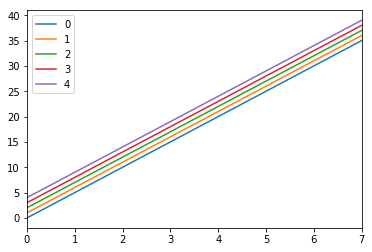

In [155]:
import matplotlib.pyplot as plt
dfp1.plot()
plt.show()

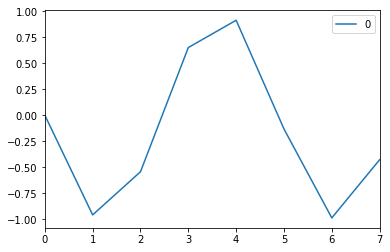

In [156]:
dfp2 = pd.DataFrame(dfp1[0].map(lambda x: np.sin(x)))
dfp2.plot()
plt.show()

          0   1   2   3   4
0  0.000000   1   2   3   4
1 -0.958924   6   7   8   9
2 -0.544021  11  12  13  14
3  0.650288  16  17  18  19
4  0.912945  21  22  23  24
5 -0.132352  26  27  28  29
6 -0.988032  31  32  33  34
7 -0.428183  36  37  38  39


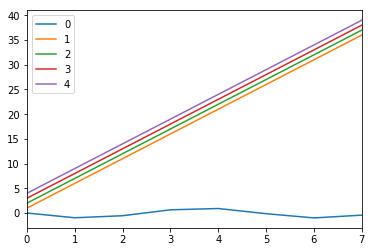

In [158]:
dfp3 = pd.concat([dfp2,dfp1.loc[:,1:4]],axis=1)
print(dfp3)
dfp3.plot()
plt.show()

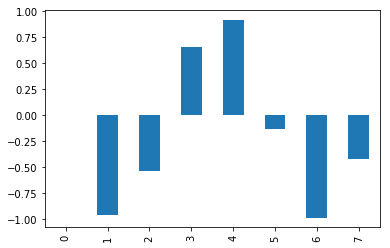

In [163]:
dfp3[0].plot(kind='bar')
plt.show()